In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


with open('Whole_Data_Set_with_Y.csv') as csvfile:
    reader = csv.reader(csvfile, dialect = 'excel')
    data_list = []

    for row in reader:
        data_list.append(row)

df_datalist = pd.DataFrame(data_list)

Text(0, 0.5, 'weights')

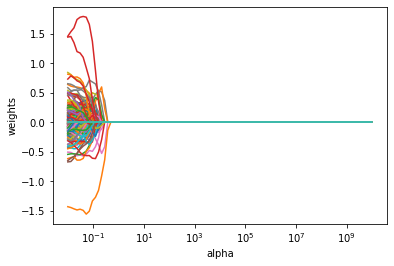

In [6]:
X_train = df_datalist.iloc[0:295,1:-1] 
y_train = df_datalist.iloc[0:295,-1]

alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True) 
coefs = []

for a in alphas: 
    lasso.set_params(alpha=a) 
    lasso.fit(scale(X_train), y_train) 
    coefs.append(lasso.coef_)

ax = plt.gca() 
ax.plot(alphas*2, coefs) 
ax.set_xscale('log') 
plt.axis('tight') 
plt.xlabel('alpha') 
plt.ylabel('weights')

In [7]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

X_test = df_datalist.iloc[295:,1:-1]
y_test = df_datalist.iloc[295:,-1]

from sklearn.matrics import 
mean_squared_error(y_test, lasso.predict(X_test))

42.41374276588567

In [10]:
from math import sqrt

RMSE = sqrt(mean_squared_error(y_test, lasso.predict(X_test)))
print (RMSE)

6.512583417192111
